<a href="https://colab.research.google.com/github/Raashidh-Rizvi/Brain-Tumor-Detection/blob/main/notesbooks/Brain_Tumour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:

!git clone https://github.com/Raashidh-Rizvi/Brain-Tumor-Detection.git


train_dir = "/content/Brain-Tumor-Detection/data/Training"
test_dir = "/content/Brain-Tumor-Detection/data/Testing"





fatal: destination path 'Brain-Tumor-Detection' already exists and is not an empty directory.


In [25]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32


# Define preprocessing pipelines
train_datagen = ImageDataGenerator(
    rescale=1./255,           # Normalization
    rotation_range=15,        # Augmentation
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)


#Load datasets


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [26]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define a custom preprocessing function
def standardize(img):
    return (img - np.mean(img)) / (np.std(img) + 1e-7)   # z-score standardization

train_datagen = ImageDataGenerator(
    preprocessing_function=standardize,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(preprocessing_function=standardize)


In [27]:
from tensorflow.keras.applications.efficientnet import preprocess_input

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)


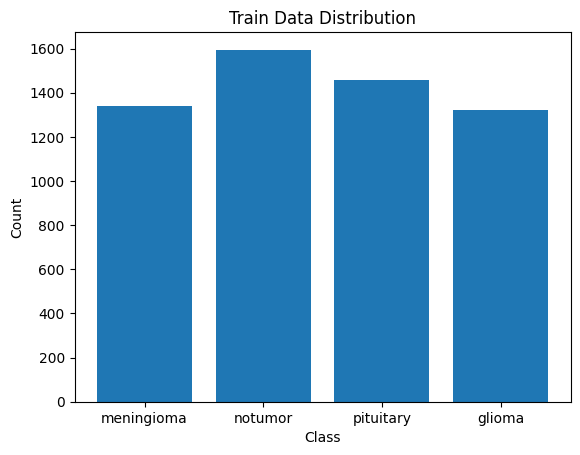

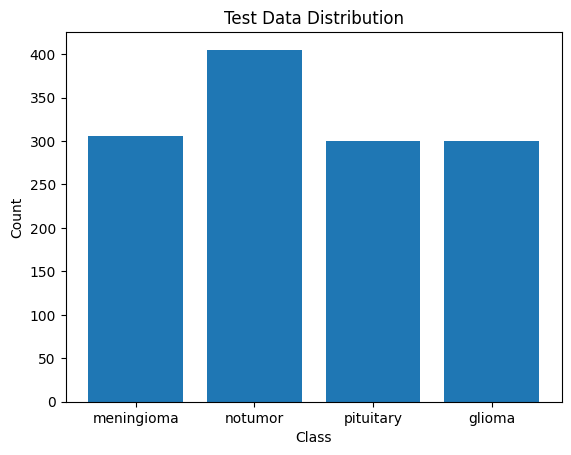

In [28]:
# Class distribution

import os
import matplotlib.pyplot as plt



train_count = {cls:len(os.listdir(os.path.join(train_dir, cls))) for cls in os.listdir(train_dir)}
test_count = {cls:len(os.listdir(os.path.join(test_dir, cls))) for cls in os.listdir(test_dir)}

plt.bar(train_count.keys(), train_count.values())
plt.title("Train Data Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

plt.bar(test_count.keys(),test_count.values())
plt.title("Test Data Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

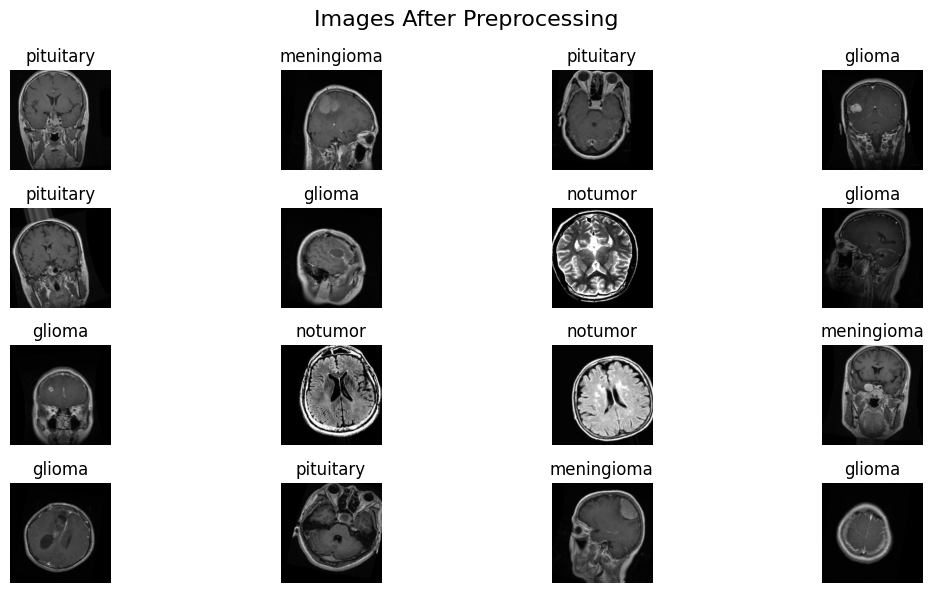

In [32]:
#Show Images After Preprocessing



class_names = list(train_generator.class_indices.keys())

# Get one batch of images and labels
x_batch, y_batch = next(train_generator)

plt.figure(figsize=(12, 6))  # Set figure size

for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(x_batch[i])
    plt.title(class_names[y_batch[i].argmax()])  #
    plt.axis("off")  # Hide axis ticks

plt.suptitle("Images After Preprocessing", fontsize=16)
plt.tight_layout()  # Adjust layout
plt.show()
